Part 1

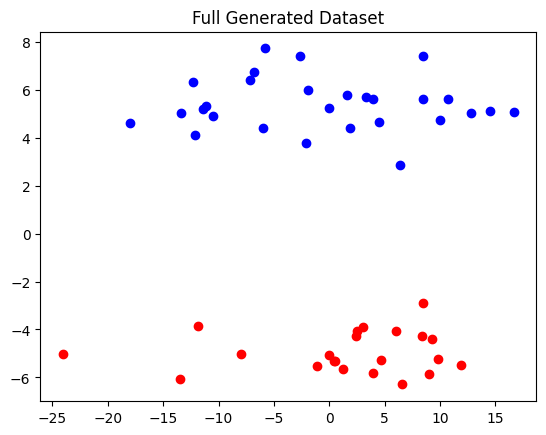

Classification line: -0.353405887182358 + 0.03987736405673862*x1


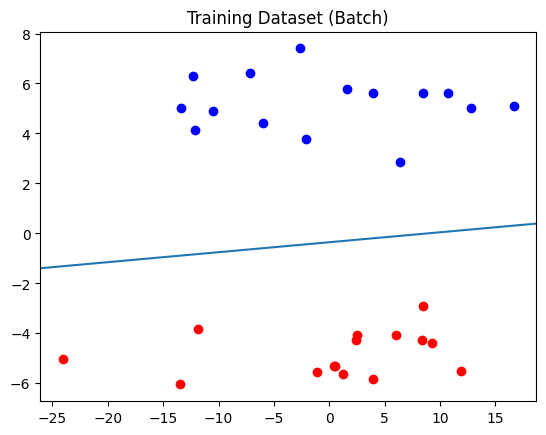

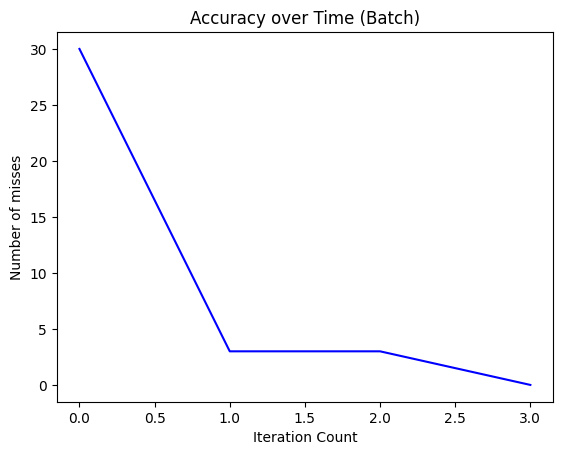

Accuracy on testing data: 20/20
Classification line: 1.6207372972694738 + 0.04067341082223282*x1


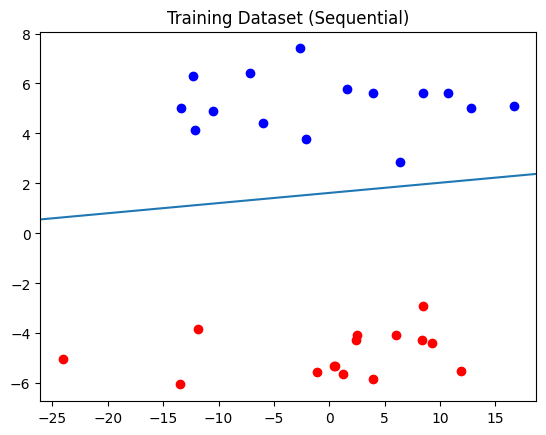

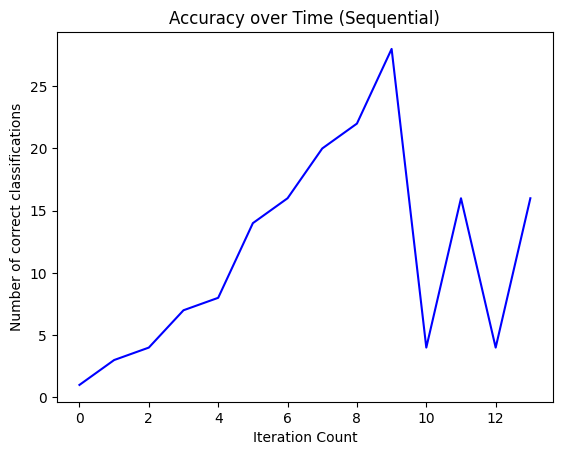

Accuracy on testing data: 20/20


In [ ]:
import numpy as np
import matplotlib.pyplot as mp
import random

from sklearn.model_selection import train_test_split

# helper methods

def plotpts(x, y, ttl):
    for i in range(len(y)):
        col = 'r'
        lbl = 'Class 2'

        if y[i] == 1:
            col = 'b'
            lbl = 'Class 1'
            
        mp.scatter(x[i][1], x[i][2], color=col, label=lbl)

    mp.title(ttl)

def plotline(w1, w2, b):
    mp.axline(xy1=(0,-b/w2), slope=(-b/w2)/(b/w1))
    return (-b/w2, (-b/w2)/(b/w1))

def classify(w, x, y):
    cl = np.dot(np.transpose(w),x)
    pred = np.sign(cl)

    return pred

def testacc(x,y,w):
    acc = 0

    for i in range (len(x)):
        pred = classify(w, x[i],y[i])

        if pred*y[i] > 0:
            acc = acc + 1
    
    return acc

# part 1a

n = 50

X = []
Y = []

for i in range(n):
    y = 2*random.randint(0, 1) - 1

    x1 = random.normalvariate(0, 10)
    x2 = 5*y + random.normalvariate(0, 1)

    Y.append(y)
    X.append([1,x1,x2])

xtr, xtst, ytr, ytst = train_test_split(X, Y, test_size=0.4)

plotpts(X,Y,"Full Generated Dataset")
mp.show()

# part 1b

w = np.random.standard_normal(3)*5
lr = 0.1
werrs = []
bs = 0
misses = 10

while misses > 0:
    sum = np.zeros(np.shape(X[0]))
    misses = 0

    for j in range(len(xtr)):
        pred = classify(w, xtr[j],ytr[j])

        if pred*ytr[j] < 0:
            err = np.multiply(xtr[j],(ytr[j]*lr))
            sum = np.add(sum, err)
            misses = misses + 1

    w = np.add(w, sum)
    bs = bs + 1
    werrs.append(misses)

boundln = plotline(w[1],w[2],w[0])

print("Classification line: " + str(boundln[0]) + " + " + str(boundln[1]) + "*x1")
plotpts(xtr,ytr,"Training Dataset (Batch)")
mp.show()

mp.plot(range(bs), werrs, 'b')
mp.title("Accuracy over Time (Batch)")
mp.xlabel("Iteration Count")
mp.ylabel("Number of misses")
mp.show()

# part 1c

acc = testacc(xtst,ytst,w)
print("Accuracy on testing data: " + str(acc) + "/" + str(len(xtst)))

# part 1d

w2 = np.random.standard_normal(3)*5
k = 0
werrs = []
bs = 0
misses = 10

while misses > 0:
    k = (k+1) % len(xtr)
    misses = 0
    sum = np.zeros(np.shape(X[0]))

    for j in range(len(xtr)):
        pred = classify(w2, xtr[j],ytr[j])

        if pred*ytr[j] < 0:
            err = np.multiply(xtr[j],(ytr[j]*lr))
            w2 = np.add(w2, err)

            bs = bs + 1

            werrs.append(j)
            misses = misses + 1

boundln = plotline(w2[1],w2[2],w2[0])

print("Classification line: " + str(boundln[0]) + " + " + str(boundln[1]) + "*x1")
plotpts(xtr,ytr,"Training Dataset (Sequential)")
mp.show()

mp.plot(range(bs), werrs, 'b')
mp.title("Accuracy over Time (Sequential)")
mp.xlabel("Iteration Count")
mp.ylabel("Number of correct classifications")
mp.show()

# part 1e

acc = testacc(xtst,ytst,w2)
print("Accuracy on testing data: " + str(acc) + "/" + str(len(xtst)))

Part 2a

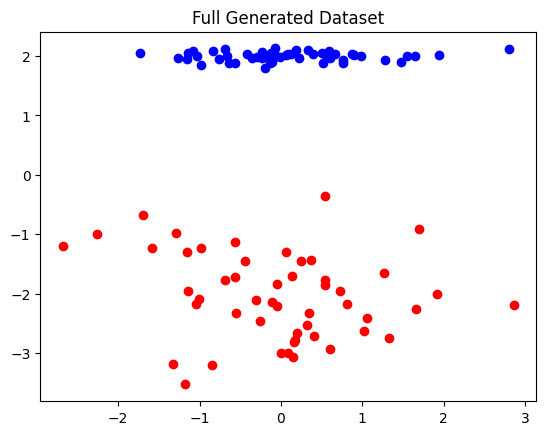

Accuracy on testing data: 0.975


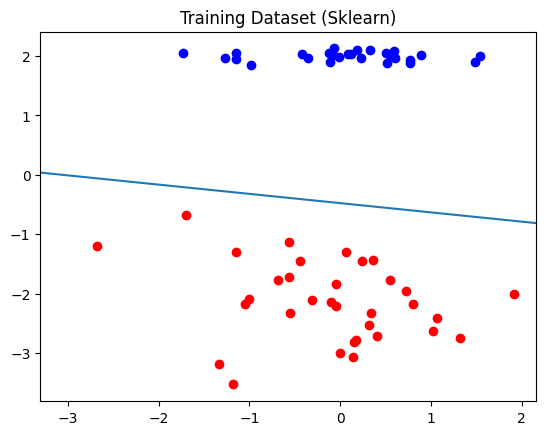

In [ ]:
import numpy as np
import matplotlib.pyplot as mp

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# helper methods

def plotpts(x, y, ttl):
    for i in range(len(y)):
        col = 'r'
        lbl = 'Class 2'

        if y[i] == 1:
            col = 'b'
            lbl = 'Class 1'
            
        pltscatter(x[i][0], x[i][1], color=col, label=lbl)

    plttitle(ttl)

def plotline(w1, w2, b):
    y1 = -b/w2
    x2 = -b/w1

    if y1 == x2:
        x2 = x2 + 1

    pltaxline(xy1=(0, y1), xy2=(x2, 0))

# part 2a

n = 100

X, Y = make_classification(n_samples=n, class_sep=2,
                           n_features=2, n_clusters_per_class=1,
                           n_informative=1, n_redundant=0,
                           n_repeated=0, flip_y=0)

X_train, x_testst, y_traintest = train_test_split(X, Y, test_size=0.4)

plotpts(X,Y,"Full Generated Dataset")
plt.show()

mdl = Perceptron()
mdl.fit(X_train, y_train)

print("Accuracy on testing data: " + str(mdl.score(X_test, y_test)))

boundln = plotline(mdl.coef_[0][0], mdl.coef_[0][1], mdl.intercept_[0])
plotpts(X_train,y_train,"Training Dataset (Sklearn)")
plt.show()

Part 2b

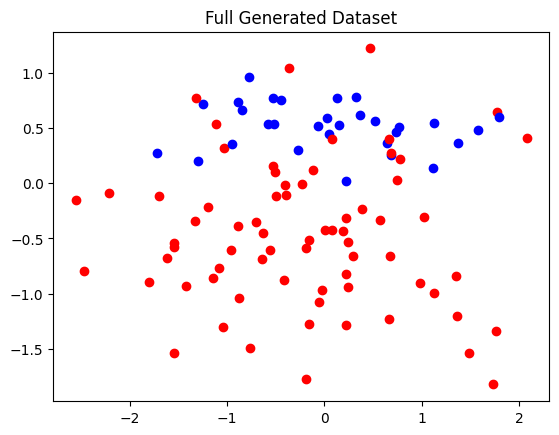

Test accuracy: 0.775
Test precision: 0.5454545454545454
Test recall: 0.6
Test F1: 0.5714285714285714

Class report:               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.55      0.60      0.57        10

    accuracy                           0.78        40
   macro avg       0.70      0.72      0.71        40
weighted avg       0.78      0.78      0.78        40

Confusion matrix: [[25  5]
 [ 4  6]]


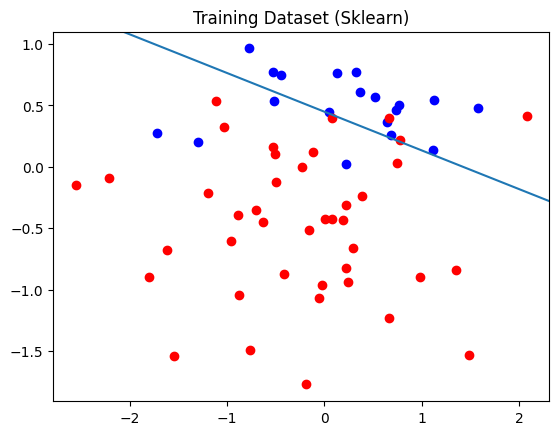

In [ ]:
import numpy as np
import matplotlib.pyplot as mp

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import sklearn.metrics as met

# helper methods

def plotpts(x, y, ttl):
    for i in range(len(y)):
        col = 'r'
        lbl = 'Class 2'

        if y[i] == 1:
            col = 'b'
            lbl = 'Class 1'
            
        pltscatter(x[i][0], x[i][1], color=col, label=lbl)

    plttitle(ttl)

def plotline(w1, w2, b):
    y1 = -b/w2
    x2 = -b/w1

    if y1 == x2:
        x2 = x2 + 1

    pltaxline(xy1=(0, y1), xy2=(x2, 0))

# part 2b

n = 100

X, Y = make_classification(n_samples=n, class_sep=0.5,
                           n_features=2, n_clusters_per_class=1,
                           n_informative=1, n_redundant=0,
                           n_repeated=0, flip_y=0, weights=[0.7])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

plotpts(X,Y,"Full Generated Dataset")
plt.show()

mdl = Perceptron()
mdl.fit(X_train, y_train

ypred = mdl.predict(x_testst)

print("Test accuracy: " + str(met.accuracy_score(ypred, y_test)))
print("Test precision: " + str(met.precision_score(ypred, y_test)))
print("Test recall: " + str(met.recall_score(ypred, y_testst)))
print("Test F1: " + str(met.f1_score(ypred, y_test)))

print("\nClass report: " + str(met.classification_report(ypred, y_test)))
print("Confusion matrix: " + str(met.confusion_matrix(ypred, y_test)))

boundln = plotline(mdl.coef_[0][0], mdl.coef_[0][1], mdl.intercept_[0])
plotpts(X_train,y_train,"Training Dataset (Sklearn)")
plt.show()